In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_style("darkgrid")


%matplotlib inline


In [2]:
full_train = pd.read_csv('train.csv')
full_test = pd.read_csv('test.csv')

In [3]:
# Number of Rows and Columns in test and train data

print(full_train.shape)
print(full_test.shape)

(1460, 81)
(1459, 80)


In [4]:
# column descriptions
with open('data_description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Training Data Cleaning 

Training Data

In [5]:
mtraind = (full_train.isnull().sum())
mtestd = ((full_test.isnull().sum()))
print(mtraind[mtraind > 0].sort_values())

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


In [6]:
#null values for test data
mtestd[mtestd > 0].sort_values()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

Missing Percentages

In [7]:
missing_perc = round(100 * mtraind[mtraind > 0].sort_values() / len(full_train), 2)
missing_perc

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
GarageYrBlt      5.55
LotFrontage     17.74
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64

In [8]:
full_train.drop(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1, inplace=True)

In [9]:
full_train.shape

(1460, 76)

## Categorical Data and Filling Proceedure

In [10]:
print(full_train.describe(), '\n\n\n')
print(full_train.info())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Seperate categorical and numerical columns

In [11]:
train_num = full_train.select_dtypes(exclude='object')
train_cat = full_train.select_dtypes(include='object')

In [12]:
train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [13]:
train_cat.shape

(1460, 38)

In [14]:
## filling null values with value before

train_cat.fillna(method='ffill', inplace = True)

In [15]:
from sklearn.preprocessing import LabelEncoder

# change the categorical data into numerical codes

cat = train_cat.astype(str).apply(LabelEncoder().fit_transform)
print(cat.shape)
cat.head()

(1460, 38)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [16]:
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
## filling null values with value before

train_num.fillna(method='ffill', inplace = True)
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
#adding both numerical and categorical data

final_data = pd.concat([train_num,cat],axis=1)

In [19]:
print(final_data.shape)
final_data.head()

(1460, 76)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,4,2,6,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,4,3,6,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,4,2,6,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,4,2,6,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,4,2,6,1,1,4,4,2,8,4


## Training and fitting the model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [21]:
final_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Elect

In [22]:
X = final_data.drop('SalePrice', axis=1)
y = final_data.SalePrice

Cross val is used to determine whether the model used is appropriate based on the negative MAE value average

In [23]:
cval_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

In [24]:
scores = -1 * cross_val_score(cval_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Mean absolute error scores:\n", scores)

Mean absolute error scores:
 [15928.45614833 16393.31710188 16498.28969125 14737.12023759
 19116.6527317 ]


In [25]:
print(f"Mean of the absolute errors : {scores.mean()}")

Mean of the absolute errors : 16534.76718214897


Now Lets fit the model

In [26]:
#drop columns with most missing data. ALso cleaning the test data to use for the prediction
full_test.drop(['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature'], axis=1, inplace=True)


In [27]:
#seperate categorical data and numeric data
test_num = full_test.select_dtypes(exclude="object")
test_cat = full_test.select_dtypes(include='object')

test_num.fillna(method = 'ffill', inplace = True)
test_cat.fillna(method = 'ffill', inplace = True)

test_cat = test_cat.astype(str).apply(LabelEncoder().fit_transform)

final_test = pd.concat([test_num,test_cat],axis=1)
final_test.shape

(1459, 75)

In [28]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4).fit(X, y)
pred = my_model.predict(final_test)

In [41]:
from sklearn.metrics import mean_absolute_error
adjusted_y = y.iloc[:1459]
print(mean_absolute_error(adjusted_y, pred))

79904.28908124143


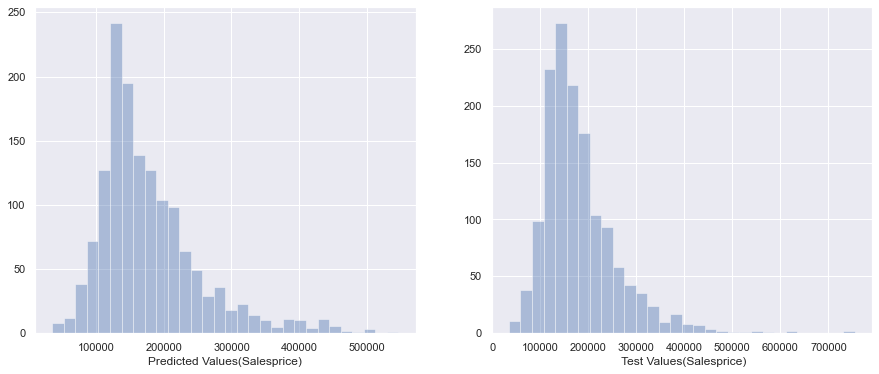

In [36]:

fig, axs = plt.subplots(1,2, figsize=(15, 6))
sns.distplot(pred, ax = axs[0], kde = False, bins = 30, axlabel='Predicted Values(Salesprice)')
sns.distplot(y, ax = axs[1], kde = False , bins = 30, axlabel=' Test Values(Salesprice)')